# Higgs Dataset

## What happens when you smash things together near the speed of light?

The Higgs boson has been sought after for decades. Can we use machine learning to gather any more information about it?

In [2]:
import pandas as pd
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
callback = keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=0, batch_size=32, write_graph=True)
%matplotlib inline
np.random.seed(0)

Using TensorFlow backend.


In [3]:
column_names = ['Class Label', 'lepton pT', 'lepton eta', 
                'lepton phi', 'missing energy magnitude',
                'missing energy phi', 'jet 1 pt', 'jet 1 eta',
                'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt',  'jet 2 eta', 
                'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 
                'jet 3 phi',' jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 
                'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 
                'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
               ]

In [4]:
df = pd.read_csv('datasets/HIGGS.csv', names = column_names)

In [6]:
callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True)

In [5]:
df.head()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [6]:
df.describe()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [7]:
df.isnull().values.any()

False

In [7]:
labels = df["Class Label"]
labels.head()

df.drop(["Class Label"], axis=1, inplace=True)
df.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [8]:
#Try using decision tree
scaler = StandardScaler()
scaler.fit(df)
scaled_X_vals = scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(scaled_X_vals, labels, test_size=0.5)


In [11]:
clf = DecisionTreeClassifier()
fitted = clf.fit(X_train, y_train, callbacks=)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("f1 score: {}".format(f1))

f1 score: 0.6783970129475747


In [12]:

# from sklearn import tree
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=df.keys(),  
#                          class_names=["No Higgs","Higgs"],  
#                          filled=True, rounded=True,  
#                          special_characters=True)
# graph = graphviz.Source(dot_data)
# graph
#Takes too long


In [9]:
X_train.shape

(5500000, 28)

In [10]:
loss_result = []
accuracy_result = []
label_result = []

In [11]:
from keras.models import Sequential
from keras.layers import Dense
seq_model = Sequential()
seq_model.add(Dense(28, activation='sigmoid', input_shape=(28,)))
seq_model.add(Dense(16, activation='sigmoid'))
seq_model.add(Dense(4, activation='sigmoid'))
seq_model.add(Dense(1, activation='sigmoid'))
seq_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


In [12]:
seq_model.fit(X_train, y_train, 
              batch_size=64, epochs=10, 
              verbose=1, validation_data=(X_test, y_test),
              callbacks=[callback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 174s 32us/step - loss: 0.6638 - acc: 0.5927 - val_loss: 0.6338 - val_acc: 0.6409
Epoch 2/10
5500000/5500000 [==============================] - 151s 28us/step - loss: 0.6255 - acc: 0.6552 - val_loss: 0.6171 - val_acc: 0.6653
Epoch 3/10
5500000/5500000 [==============================] - 146s 27us/step - loss: 0.6027 - acc: 0.6777 - val_loss: 0.5869 - val_acc: 0.6909
Epoch 4/10
5500000/5500000 [==============================] - 155s 28us/step - loss: 0.5770 - acc: 0.6986 - val_loss: 0.5691 - val_acc: 0.7055
Epoch 5/10
5500000/5500000 [==============================] - 154s 28us/step - loss: 0.5605 - acc: 0.7105 - val_loss: 0.5543 - val_acc: 0.7151
Epoch 6/10
5500000/5500000 [==============================] - 154s 28us/step - loss: 0.5507 - acc: 0.7171 - val_loss: 0.5467 - val_acc: 0.7193
Epoch 7/10
5500000/5500000 [==============================] - 150s 27us/step - loss: 0.5

In [17]:
loss_result.append(".550")
accuracy_result.append(".71")
label_result.append("4LySigBinCrosSGD")

In [18]:
tanh_model = Sequential()
tanh_model.add(Dense(28, activation='tanh', input_shape=(28,)))
tanh_model.add(Dense(16, activation='tanh'))
tanh_model.add(Dense(4, activation='tanh'))
tanh_model.add(Dense(1, activation='tanh'))
tanh_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
tanh_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


In [19]:
tanh_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 156s 28us/step - loss: 0.5979 - acc: 0.6792 - val_loss: 0.5634 - val_acc: 0.7088
Epoch 2/10
5500000/5500000 [==============================] - 216s 39us/step - loss: 0.5598 - acc: 0.7115 - val_loss: 0.5496 - val_acc: 0.7173
Epoch 3/10
5500000/5500000 [==============================] - 226s 41us/step - loss: 0.5980 - acc: 0.7123 - val_loss: 0.5396 - val_acc: 0.7234
Epoch 4/10
5500000/5500000 [==============================] - 150s 27us/step - loss: 0.7252 - acc: 0.6835 - val_loss: 0.5662 - val_acc: 0.7042
Epoch 5/10
5500000/5500000 [==============================] - 136s 25us/step - loss: 0.5559 - acc: 0.7166 - val_loss: 0.5423 - val_acc: 0.7227
Epoch 6/10
5500000/5500000 [==============================] - 135s 25us/step - loss: 0.5707 - acc: 0.7230 - val_loss: 0.5371 - val_acc: 0.7261
Epoch 7/10
5500000/5500000 [==============================] - 143s 26us/step - loss: 3.6

In [20]:
loss_result.append(".71")
accuracy_result.append(".52")
label_result.append("3LyTanhBinCrosSGD")

In [21]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [22]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/5
5500000/5500000 [==============================] - 131s 24us/step - loss: 0.6472 - acc: 0.6181 - val_loss: 0.6269 - val_acc: 0.6490
Epoch 2/5
5500000/5500000 [==============================] - 131s 24us/step - loss: 0.6111 - acc: 0.6653 - val_loss: 0.5930 - val_acc: 0.6837
Epoch 3/5
5500000/5500000 [==============================] - 146s 27us/step - loss: 0.5813 - acc: 0.6934 - val_loss: 0.5720 - val_acc: 0.7005
Epoch 4/5
5500000/5500000 [==============================] - 191s 35us/step - loss: 0.5668 - acc: 0.7044 - val_loss: 0.5616 - val_acc: 0.7077
Epoch 5/5
5500000/5500000 [==============================] - 162s 30us/step - loss: 0.5583 - acc: 0.7111 - val_loss: 0.5546 - val_acc: 0.7144


In [23]:
loss_result.append(".55")
accuracy_result.append(".71")
label_result.append("3LySigBinCrosSGD")

In [24]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [25]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 162s 29us/step - loss: 0.5544 - acc: 0.7112 - val_loss: 0.5339 - val_acc: 0.7271
Epoch 2/6
5500000/5500000 [==============================] - 182s 33us/step - loss: 0.5283 - acc: 0.7311 - val_loss: 0.5237 - val_acc: 0.7341
Epoch 3/6
5500000/5500000 [==============================] - 163s 30us/step - loss: 0.5231 - acc: 0.7342 - val_loss: 0.5210 - val_acc: 0.7355
Epoch 4/6
5500000/5500000 [==============================] - 149s 27us/step - loss: 0.5207 - acc: 0.7358 - val_loss: 0.5193 - val_acc: 0.7367
Epoch 5/6
5500000/5500000 [==============================] - 191s 35us/step - loss: 0.5191 - acc: 0.7368 - val_loss: 0.5193 - val_acc: 0.7368
Epoch 6/6
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.5181 - acc: 0.7375 - val_loss: 0.5170 - val_acc: 0.7379


In [26]:
loss_result.append(".52")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosAdam")

In [27]:
rms_prop = Sequential()
rms_prop.add(Dense(28, activation='sigmoid', input_shape=(28,)))
rms_prop.add(Dense(10, activation='sigmoid'))
rms_prop.add(Dense(1, activation='sigmoid'))
rms_prop.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
rms_prop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [28]:
rms_prop.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 156s 28us/step - loss: 0.5594 - acc: 0.7074 - val_loss: 0.5351 - val_acc: 0.7264
Epoch 2/6
5500000/5500000 [==============================] - 174s 32us/step - loss: 0.5299 - acc: 0.7299 - val_loss: 0.5253 - val_acc: 0.7331
Epoch 3/6
5500000/5500000 [==============================] - 151s 28us/step - loss: 0.5239 - acc: 0.7341 - val_loss: 0.5237 - val_acc: 0.7344
Epoch 4/6
5500000/5500000 [==============================] - 180s 33us/step - loss: 0.5216 - acc: 0.7358 - val_loss: 0.5246 - val_acc: 0.7332
Epoch 5/6
5500000/5500000 [==============================] - 202s 37us/step - loss: 0.5203 - acc: 0.7366 - val_loss: 0.5195 - val_acc: 0.7370
Epoch 6/6
5500000/5500000 [==============================] - 175s 32us/step - loss: 0.5193 - acc: 0.7373 - val_loss: 0.5190 - val_acc: 0.7376


In [29]:
loss_result.append(".51")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosRMSP")

In [30]:
kld = Sequential()
kld.add(Dense(28, activation='sigmoid', input_shape=(28,)))
kld.add(Dense(10, activation='sigmoid'))
kld.add(Dense(1, activation='sigmoid'))
kld.compile(loss='kullback_leibler_divergence', optimizer='rmsprop', metrics=['accuracy'])
kld.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [31]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 151s 27us/step - loss: 0.5172 - acc: 0.7380 - val_loss: 0.5173 - val_acc: 0.7376
Epoch 2/6
5500000/5500000 [==============================] - 159s 29us/step - loss: 0.5166 - acc: 0.7383 - val_loss: 0.5166 - val_acc: 0.7382
Epoch 3/6
5500000/5500000 [==============================] - 166s 30us/step - loss: 0.5162 - acc: 0.7385 - val_loss: 0.5172 - val_acc: 0.7378
Epoch 4/6
5500000/5500000 [==============================] - 152s 28us/step - loss: 0.5158 - acc: 0.7388 - val_loss: 0.5149 - val_acc: 0.7396
Epoch 5/6
5500000/5500000 [==============================] - 176s 32us/step - loss: 0.5156 - acc: 0.7387 - val_loss: 0.5152 - val_acc: 0.7391
Epoch 6/6
5500000/5500000 [==============================] - 214s 39us/step - loss: 0.5155 - acc: 0.7391 - val_loss: 0.5144 - val_acc: 0.7398


In [32]:
loss_result.append(".51")
accuracy_result.append(".74")
label_result.append("3LySigBinCrosAdam2nd")

In [33]:
poisson = Sequential()
poisson.add(Dense(28, activation='sigmoid', input_shape=(28,)))
poisson.add(Dense(10, activation='sigmoid'))
poisson.add(Dense(1, activation='sigmoid'))
poisson.compile(loss='poisson', optimizer='rmsprop', metrics=['accuracy'])
poisson.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [34]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 211s 38us/step - loss: 0.5153 - acc: 0.7389 - val_loss: 0.5147 - val_acc: 0.7394
Epoch 2/6
5500000/5500000 [==============================] - 213s 39us/step - loss: 0.5152 - acc: 0.7392 - val_loss: 0.5150 - val_acc: 0.7390
Epoch 3/6
5500000/5500000 [==============================] - 202s 37us/step - loss: 0.5151 - acc: 0.7392 - val_loss: 0.5148 - val_acc: 0.7394
Epoch 4/6
5500000/5500000 [==============================] - 157s 29us/step - loss: 0.5149 - acc: 0.7394 - val_loss: 0.5141 - val_acc: 0.7398
Epoch 5/6
5500000/5500000 [==============================] - 147s 27us/step - loss: 0.5148 - acc: 0.7394 - val_loss: 0.5145 - val_acc: 0.7397
Epoch 6/6
5500000/5500000 [==============================] - 147s 27us/step - loss: 0.5146 - acc: 0.7396 - val_loss: 0.5142 - val_acc: 0.7396


In [35]:
kld.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 129s 23us/step - loss: 7.5479e-04 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 2/6
5500000/5500000 [==============================] - 127s 23us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 3/6
5500000/5500000 [==============================] - 127s 23us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 4/6
5500000/5500000 [==============================] - 182s 33us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 5/6
5500000/5500000 [==============================] - 198s 36us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 6/6
5500000/5500000 [==============================] - 148s 27us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301


In [36]:
loss_result.append(".58")
accuracy_result.append(".73")
label_result.append("3LyKLDAdam")

In [37]:
poisson.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 157s 28us/step - loss: 0.8017 - acc: 0.7091 - val_loss: 0.7901 - val_acc: 0.7278
Epoch 2/6
5500000/5500000 [==============================] - 150s 27us/step - loss: 0.7885 - acc: 0.7299 - val_loss: 0.7872 - val_acc: 0.7319
Epoch 3/6
5500000/5500000 [==============================] - 189s 34us/step - loss: 0.7863 - acc: 0.7335 - val_loss: 0.7858 - val_acc: 0.7345
Epoch 4/6
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.7853 - acc: 0.7351 - val_loss: 0.7853 - val_acc: 0.7353
Epoch 5/6
5500000/5500000 [==============================] - 157s 29us/step - loss: 0.7848 - acc: 0.7359 - val_loss: 0.7845 - val_acc: 0.7367
Epoch 6/6
5500000/5500000 [==============================] - 184s 33us/step - loss: 0.7846 - acc: 0.7363 - val_loss: 0.7846 - val_acc: 0.7366


In [38]:
loss_result.append(".78")
accuracy_result.append(".73")
label_result.append("3LySigPoisRMS")

In [39]:
def create_model(activation_fn, loss_fn, optimizer_fn):
    seq = Sequential()
    seq.add(Dense(28, activation=activation_fn, input_shape=(28,)))
    seq.add(Dense(10, activation=activation_fn))
    seq.add(Dense(1, activation=activation_fn))
    seq.compile(loss=loss_fn, optimizer=optimizer_fn, metrics=['accuracy'])
    seq.summary()
    return seq

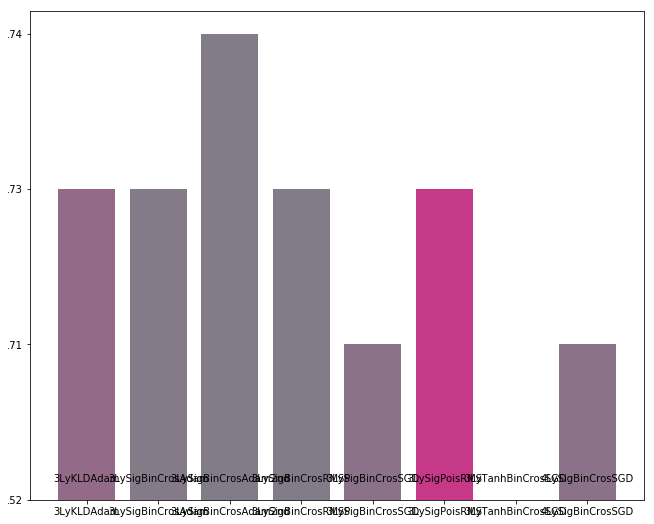

In [54]:
import matplotlib as plt
import matplotlib.pyplot as plot

# display(loss_result.pop(7))
# display(loss_result)
accycolor = []
#Generate Colors on red/green axis based on execution time
for index in range(0,len(loss_result)):
    
    percent_red = float(loss_result[index])
    percent_green = 1 - percent_red
    red_10 = int(percent_red * 255)
    green_10 = int(percent_green * 255)
    red_16 = str(hex(red_10))[-2:].replace("x", "0")
    green_16 = str(hex(green_10))[-2:].replace("x", "0")
    accycolor.append("#"+str(red_16)+str(green_16)+"88")

fig, ax = plot.subplots(figsize=(11, 9))
rects = ax.bar(label_result, accuracy_result, color=accycolor)
random_chance = 0
# plot.axhline(y=random_chance, color='r', linestyle='-')
ax.set_ylim(ymin=0)
# Indicate Times.
labels = ["%s" % l for l in label_result]


plot.plot()
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width() / 2, .1, label,ha='center', va='bottom')

THIS IS AN A AMZING DATASET
<class 'int'>


[]

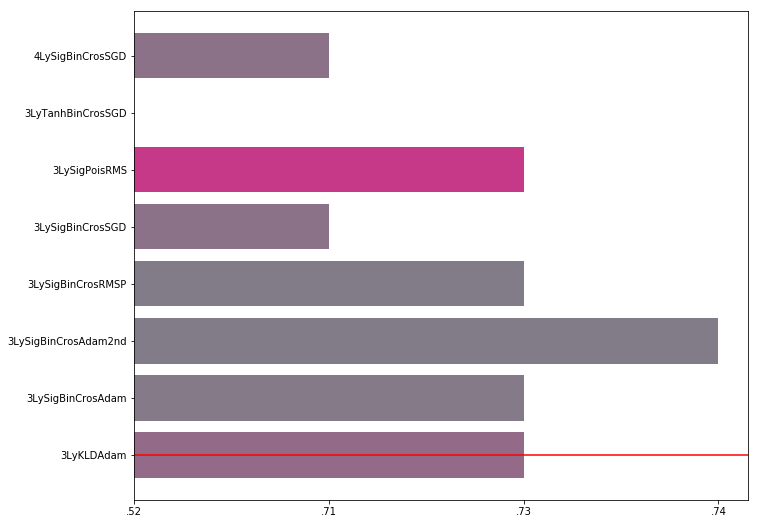

In [55]:
losscolor = []
#Generate Colors on red/green axis based on execution time
for index in range(0,len(loss_result)):
    
    percent_red = float(loss_result[index])
    percent_green = 1 - percent_red
    red_10 = int(percent_red * 255)
    green_10 = int(percent_green * 255)
    red_16 = str(hex(red_10))[-2:].replace("x", "0")
    green_16 = str(hex(green_10))[-2:].replace("x", "0")
    losscolor.append("#"+str(red_16)+str(green_16)+"88")

fig, ax = plot.subplots(figsize=(11, 9))

print('THIS IS AN A AMZING DATASET')
print(type(left))
rects = ax.barh(label_result, accuracy_result, color=accycolor)
random_chance = 0
plot.axhline(y=random_chance, color='r', linestyle='-')

# Indicate Times.
labels = ["%s" % l for l in label_result]


plot.plot()
# for rect, label in zip(rects, labels):
#     ax.text(rect.get_x() + rect.get_width() / 2, .1, label,ha='center', va='bottom')

In [ ]:
df.drop